In [14]:
import numpy as np
import matplotlib.pyplot as plt

#### Problem 1 : Integration: Trapezoid and Midpoint ####


0.23284229792795294


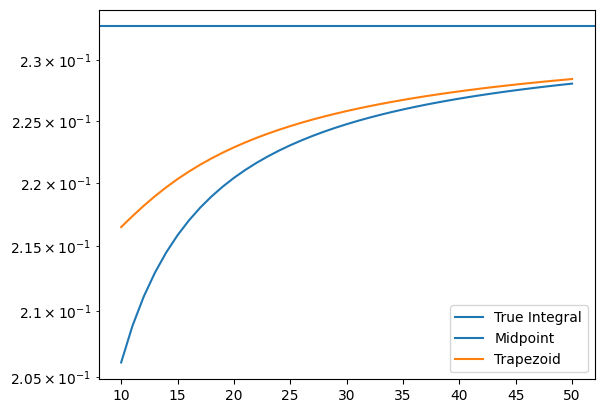

In [40]:
def f(x):
    return np.cos(2*x)*np.exp(-3*x)

def midpoint(f, n, a, b):
    #f: function 
    #n: # of partitions
    #a, b: bounds 

    sum = 0
    x = np.linspace(a, b, n)

    for i in range(n-1):
        sum += f((x[i]+x[i+1])/2)

    return sum * (b-a)/n

def trapezoid(f, n, a, b):
    #f: function 
    #n: # of partitions
    #a, b: bounds 

    h = (b-a)/n
    x = np.linspace(a, b, n)
    sum = f(x[0])+f(x[-1])

    for i in range(1,n-1):
        sum += 2*f((x[i]))
    
    return (h/2)*sum 

def partvsval(Iestimator):
    numParts = np.linspace(10,50, 41)
    estimates = []

    for bins in range(10,51):
        estimates.append(Iestimator(f, bins, 0, np.pi/2))

    return (numParts, estimates)

exactI = (3/13)*(1+np.exp(-3*np.pi/2))

midData = partvsval(midpoint)
trapData = partvsval(trapezoid)

print(exactI)
plt.axhline(y = exactI, label = 'True Integral')
plt.semilogy(midData[0], midData[1], label = 'Midpoint')
plt.semilogy(trapData[0], trapData[1], label = 'Trapezoid')
plt.legend()
plt.show()
# estI = midpoint(f, 10, 0, np.pi/2)

